In [17]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib
from IPython.display import display
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

,op,hi,lo,cl,volume
timestamp,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77
...,...,...,...,...,...
2022-07-15 19:45:00+00:00,2925724.0,2933260.0,2918440.0,2930675.0,36.51
2022-07-15 20:00:00+00:00,2931240.0,2932100.0,2918949.0,2922080.0,15.38
2022-07-15 20:15:00+00:00,2922492.0,2937340.0,2916708.0,2923836.0,40.01


<AxesSubplot: xlabel='timestamp'>

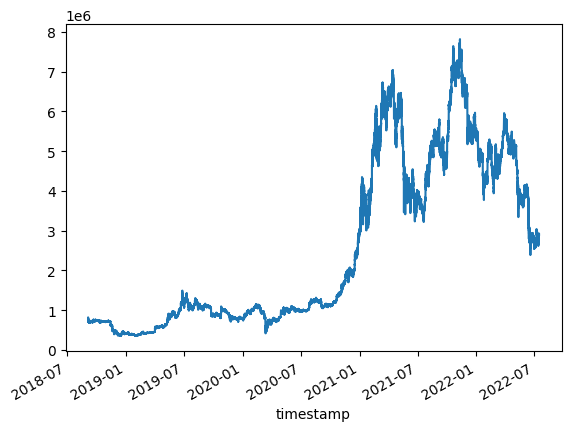

In [18]:
df = pd.read_csv("./dataset/bitcoin_price.csv", index_col=0, parse_dates=True)
df.to_pickle("pkls/df.pkl")

display(df)
df["cl"].plot()

,op,hi,lo,cl,volume,LNDP
timestamp,,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01,NaN
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01,0.308054
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03,-0.180986
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22,-0.026719
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77,0.085133
...,...,...,...,...,...,...
2022-07-15 19:45:00+00:00,2925724.0,2933260.0,2918440.0,2930675.0,36.51,0.167200
2022-07-15 20:00:00+00:00,2931240.0,2932100.0,2918949.0,2922080.0,15.38,-0.293708
2022-07-15 20:15:00+00:00,2922492.0,2937340.0,2916708.0,2923836.0,40.01,0.060076


mean(%) : 0.09493884690112914
volatility(%) : 42.38029092055072


<AxesSubplot: xlabel='timestamp'>

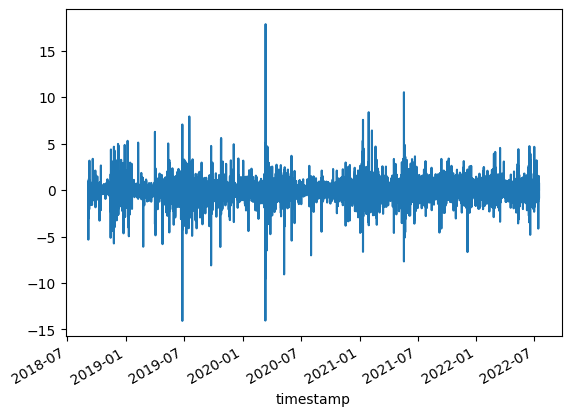

In [19]:
df = pd.read_pickle("pkls/df.pkl")

#終値の値を対数差分変換。データは対数収益率となった。
df["LNDP"] = np.log(df["cl"])
df["LNDP"] = df["LNDP"].diff(periods=1)
df["LNDP"] *= 100

df.to_pickle("pkls/with_LNDP.pkl")

#出力
display(df)
#平均と標準偏差(ボラティリティ)を算出
print("mean(%) : {}".format(np.mean(df["LNDP"]) * 100))
print("volatility(%) : {}".format(np.std(df["LNDP"]) * 100))
df["LNDP"].plot()

In [20]:
df = pd.read_pickle("pkls/with_LNDP.pkl")

#正解ラベルの付与
# 現在時刻をtとしたとき、時刻t + 1で収益率が0より大きいかを判定し、時刻tの正解ラベルを決定する。
df["C"] = np.where(
    df["LNDP"] > 0,
    "u",
    "d"
)
df["C"] = df["C"].shift(-1)

df.to_pickle("pkls/with_C.pkl")

#出力
display(df)

,op,hi,lo,cl,volume,LNDP,C
timestamp,,,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01,NaN,u
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01,0.308054,d
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03,-0.180986,d
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22,-0.026719,u
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77,0.085133,d
...,...,...,...,...,...,...,...
2022-07-15 19:45:00+00:00,2925724.0,2933260.0,2918440.0,2930675.0,36.51,0.167200,d
2022-07-15 20:00:00+00:00,2931240.0,2932100.0,2918949.0,2922080.0,15.38,-0.293708,u
2022-07-15 20:15:00+00:00,2922492.0,2937340.0,2916708.0,2923836.0,40.01,0.060076,d


In [21]:
df = pd.read_pickle("pkls/with_C.pkl")

#インジケーター、テクニカル指標を計算
def calc_features(df):
    open = df['op']
    high = df['hi']
    low = df['lo']
    close = df['cl']
    volume = df['volume']
    
    orig_columns = df.columns

    hilo = (df['hi'] + df['lo']) / 2
    df['EMA'] = talib.EMA(close, timeperiod=30) - hilo
    df['ADX'] = talib.ADX(high, low, close, timeperiod=14)
    df['MOM'] = talib.MOM(close, timeperiod=10)
    df['RSI'] = talib.RSI(close, timeperiod=14)
    df['AD'] = talib.AD(high, low, close, volume)
    df['ATR'] = talib.ATR(high, low, close, timeperiod=14)

    return df

df = calc_features(df)
df = df.dropna()

df.to_pickle("pkls/with_features.pkl")

#出力
display(df)

,op,hi,lo,cl,volume,LNDP,C,EMA,ADX,MOM,RSI,AD,ATR
timestamp,,,,,,,,,,,,,
2018-09-05 15:30:00+00:00,781250.0,781560.0,779500.0,779500.0,0.64,-0.328133,u,10920.400000,87.091968,-2059.0,31.428028,59.869337,8865.760067
2018-09-05 15:45:00+00:00,778162.0,782554.0,775128.0,779690.0,3.06,0.024372,u,11850.664516,86.819438,-4377.0,31.770905,60.569025,8762.920062
2018-09-05 16:00:00+00:00,780908.0,782563.0,779821.0,782466.0,2.10,0.355407,d,8968.976483,86.564705,66.0,36.747360,62.520447,8342.211486
2018-09-05 16:15:00+00:00,780036.0,780036.0,777354.0,777354.0,0.44,-0.655463,u,10639.719936,86.371552,-8723.0,32.103688,62.080447,8111.482095
2018-09-05 16:30:00+00:00,779000.0,780819.0,779000.0,780819.0,0.21,0.444752,d,8875.818649,86.031382,-3731.0,37.837712,62.290447,7779.590516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15 19:30:00+00:00,2902211.0,2930000.0,2901512.0,2925779.0,53.81,0.781608,u,-22518.729506,24.916879,34231.0,65.424939,261036.795290,14483.012823
2022-07-15 19:45:00+00:00,2925724.0,2933260.0,2918440.0,2930675.0,36.51,0.167200,d,-30197.392118,26.893720,43494.0,66.992678,261060.568671,14507.083336
2022-07-15 20:00:00+00:00,2931240.0,2932100.0,2918949.0,2922080.0,15.38,-0.293708,u,-28166.899078,28.729357,38501.0,61.703255,261052.512035,14410.220240


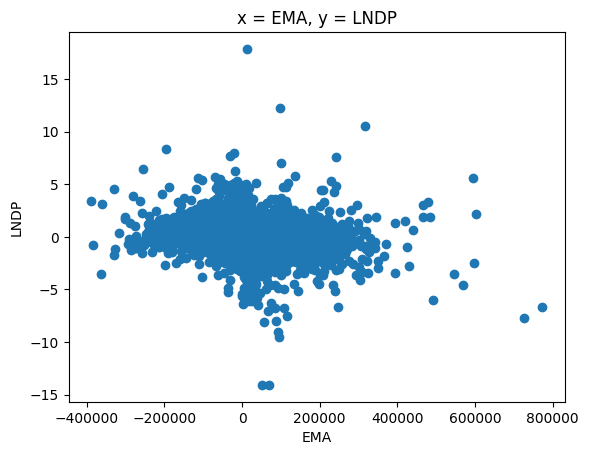

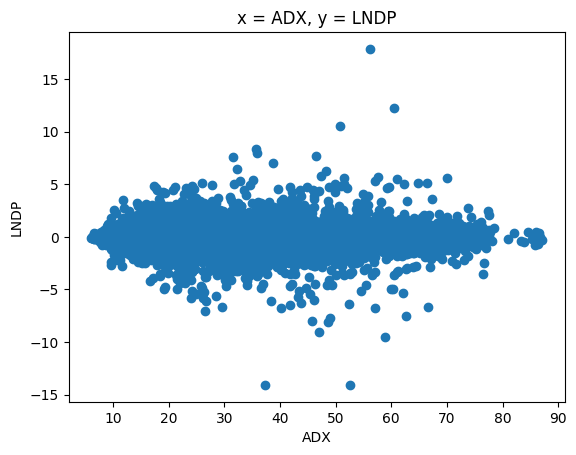

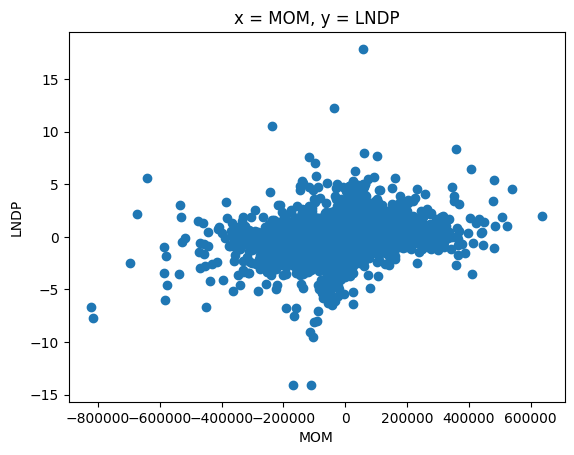

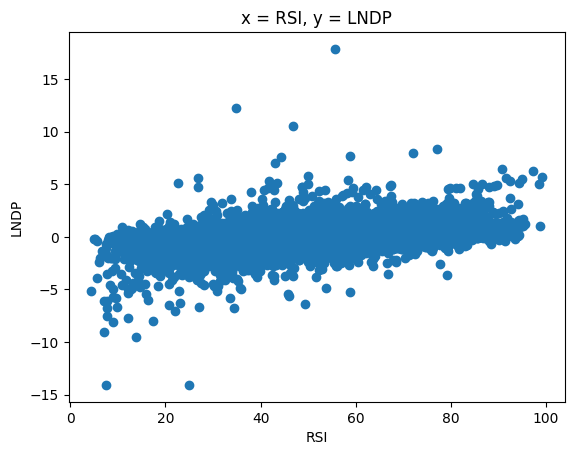

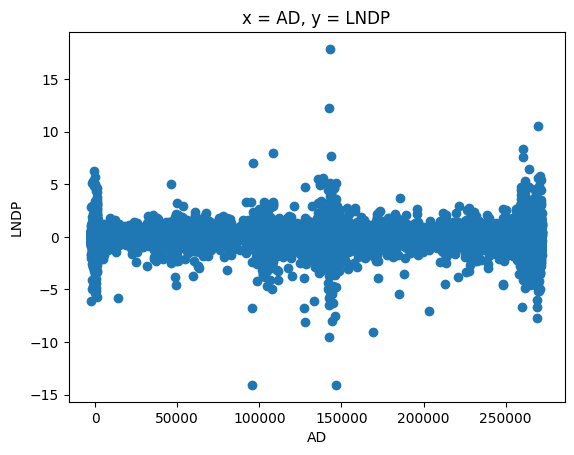

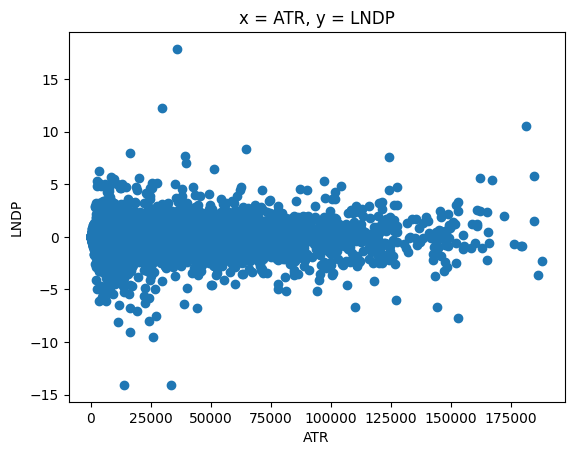

In [22]:
df = pd.read_pickle("pkls/with_features.pkl")

# OHLCVを用いて算出した各種インジケーターとLNDPの相関
def scatters(df, feature_name) :
    plt.scatter(df[feature_name], df["LNDP"])
    plt.xlabel(feature_name)
    plt.ylabel("LNDP")
    plt.title("x = " + feature_name + ", y = LNDP")
    plt.show()

scatters(df, feature_name="EMA")
scatters(df, feature_name="ADX")
scatters(df, feature_name="MOM")
scatters(df, feature_name="RSI")
scatters(df, feature_name="AD")
scatters(df, feature_name="ATR")

In [24]:
df = pd.read_pickle("pkls/with_features.pkl")

features = ["EMA", "ADX", "MOM", "RSI", "AD", "ATR"]
x_train, x_test, y_train, y_test = train_test_split(df[features], df["C"], stratify=df["C"], random_state=100)

#スケール変換
rs = RobustScaler().fit(x_train)
x_train_scaled =  rs.transform(x_train)
x_test_scaled = rs.transform(x_test)

#モデルの学習
rforest = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=1).fit(x_train_scaled, y_train)
gbc = GradientBoostingClassifier(random_state=100, learning_rate=0.01, max_depth=1).fit(x_train_scaled, y_train)

#モデルの保存
path = "models/"
pickle.dump(rforest, open(path+"rforest_test.sav", "wb"))
pickle.dump(gbc, open(path+"gbc_test.sav", "wb"))

#モデルのロード
loaded_rforest = pickle.load(open(path+"rforest_test.sav", "rb"))
loaded_gbc = pickle.load(open(path+"gbc_test.sav", "rb"))

#出力
print("random forest")
print("accuracy on training set : {}".format(loaded_rforest.score(x_train_scaled, y_train)))
print("accuracy on test set : {}".format(loaded_rforest.score(x_test_scaled, y_test)))
print()
print("Gradient Boosting Machine")
print("accuracy on training set : {}".format(loaded_gbc.score(x_train_scaled, y_train)))
print("accuracy on test set: {}".format(loaded_gbc.score(x_test_scaled, y_test)))

random forest
accuracy on training set : 0.528261457279891
accuracy on test set : 0.5257877504430627

Gradient Boosting Machine
accuracy on training set : 0.5305043506122898
accuracy on test set: 0.5280706497251509
